In [1]:
# import necessary library
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
train=pd.read_csv('C:/Users/jagadeesh baman/Documents/New folder/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('C:/Users/jagadeesh baman/Documents/New folder/titanic_test.csv')

In [4]:
#cheack how many rows and columns were there using shape
train.shape

(891, 12)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#What are the data types for each feature?
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#cheak which type of variables are there; bez this will help us in filling values,& how a variable is functioning,etc... 

In [8]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
#this is a Categorical Features,consists male 577,female 314

# like this we have
#Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
#Categorical Features: Survived, Sex, Embarked, Pclass
#Alphanumeric Features: Ticket, Cabin

In [10]:
#see a summary of the training dataset
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Silven, Miss. Lyyli Karoliina",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# we have missing values in 

In [13]:
#to cheack the missing values
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [14]:
#will see all feature wise

# sex feature

In [15]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
#with this we come to an idea that 'Sex' is a categorical variable consists, male-577 & female 314, like this for evey variable
#we come to an idea

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


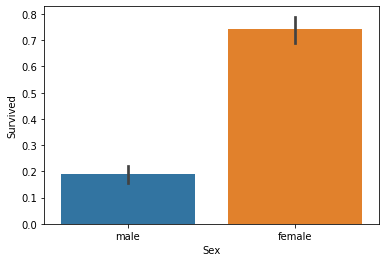

In [17]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)#take independent variable in x-axis & dependent variable in y-axis

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [18]:
# females have a much higher chance of survival than males,The Sex feature is essential in our predictions.

In [19]:
#if you want only one female or male passenger, then create a DataFrame which consists only male or female
# all_female=pd.DataFrame(df.loc[df.Sex=='female',:])

#now we do not need this. because i had this dought in my starting stage so writtrn this

# Pclass

In [20]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


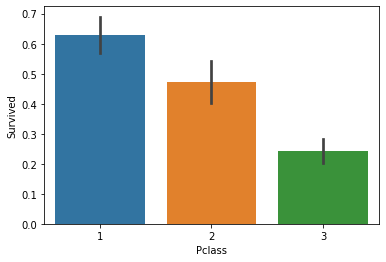

In [21]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [22]:
#As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

# SibSp Feature

In [23]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
percentage of SibSp = 3 who survived: 25.0
percentage of SibSp = 4 who survived: 16.666666666666664


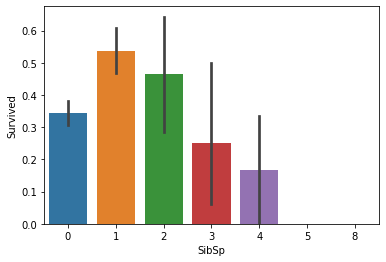

In [24]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)


print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("percentage of SibSp = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

# Parch Feature

In [25]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

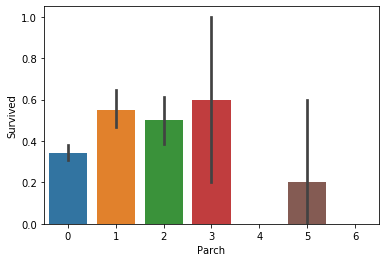

In [26]:
#draw a bar plot for Parch vs. survival
sns.barplot(x='Parch',y='Survived',data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

# Age Feature

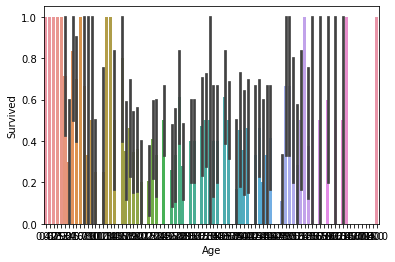

In [27]:
sns.barplot(x='Age',y='Survived',data=train)
plt.show()

In [28]:
#it is not possible to predict with above plot, for contineous variables histogram is good, or 
#                                         or
#we need to sort the ages into logical categories

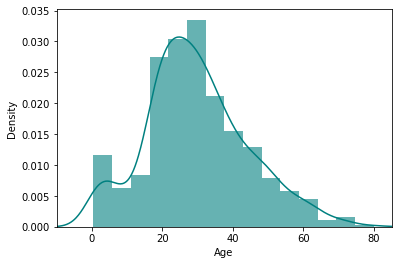

In [29]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [30]:
#it is a right skewed.

# Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


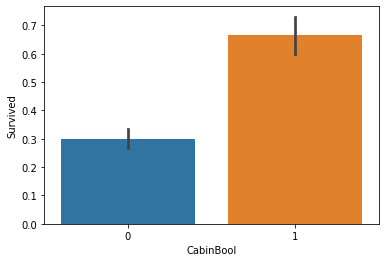

In [31]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

# Embarked Feature

In [32]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
train.Embarked.isnull().sum()

2

In [34]:
print("percentage of missing values in Embarked:", train.Embarked.isnull().sum()/train.shape[0])

percentage of missing values in Embarked: 0.002244668911335578


In [35]:
#we will fill train & test data at the same time

# looking at the test data

In [36]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,CabinBool
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.217703
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.413179
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [37]:
#toatal 418 rows, and we have missing values in Cabin, Age

In [38]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
CabinBool        0
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [39]:
print("percentage of missing values in Cabin:", test.Cabin.isnull().sum()/test.shape[0])

percentage of missing values in Cabin: 0.7822966507177034


In [40]:
#more number of values of Cabin are missing in both train and test data


In [41]:
print("percentage of missing values in Age:", test.Age.isnull().sum()/test.shape[0])

percentage of missing values in Age: 0.20574162679425836


In [42]:
#will drop Cabin
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

# Embarked Feature

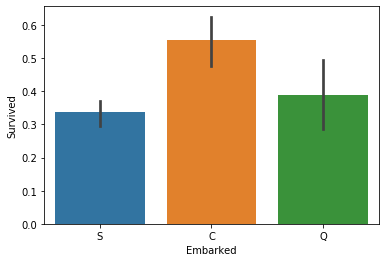

In [43]:
sns.barplot(x='Embarked',y='Survived',data=train)
plt.show()

Text(0.5, 1.0, 'Passengers per boarding location')

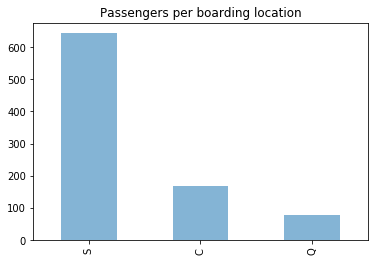

In [44]:
train.Embarked.value_counts().plot(kind='bar',alpha=0.55)
plt.title("Passengers per boarding location")

In [45]:
#passengers per boarding location is high for 'S', and passengers from 'C' survived high

In [46]:
#filling the missing value with mode

In [47]:
train = train.fillna({"Embarked": "S"})

In [48]:
#filled missing values of 'Age' with mode where i got low score, i found this is more accurate from another notebook

we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.



# Age Feature

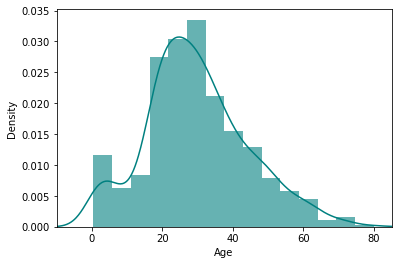

In [49]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [50]:
#it is a right skeweed, so we will fill with median value for nobais 
# i will work on diferent ways, better ways to fill the age variable

In [51]:
train_data= train.copy() #the copy method in python returns a copy of the set. we can copy a set to another set using the = operator,
#however copying a set using the = operator means that when we change the new ser the copied set will also be changed , if we
#do not want this behaviour then use the copy() method instead of = operator

In [52]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)

In [53]:
test.Age.median()

27.0

In [55]:
#we filled null values now will see the plot how it's looking

In [56]:
#just to see how it has changed, iam copying this in new one

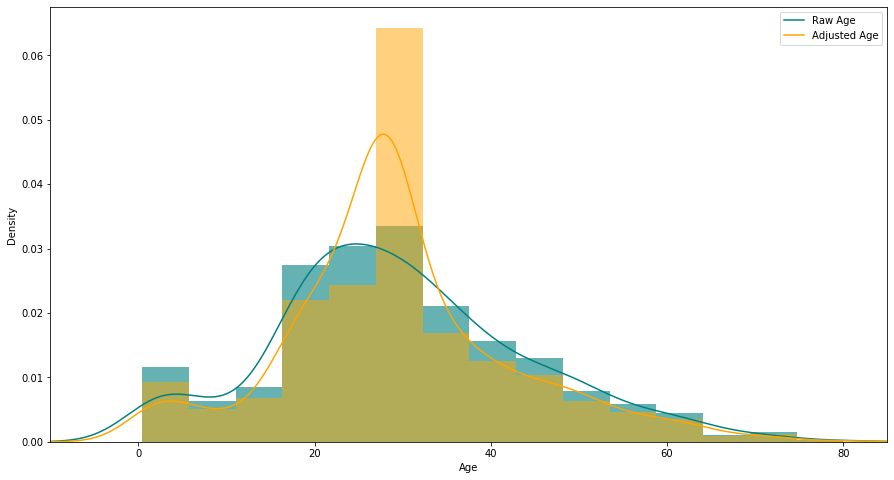

In [58]:
plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [59]:
#just to show how it has changed i copyed and did like this, now it's not looking like right skewed

In [60]:
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

In [61]:
test["Age"].fillna(test["Age"].median(skipna=True), inplace=True)

# Sex Feature

In [63]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0


In [64]:
#will drop 'Ticket'
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

# Embarked Feature

In [65]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0


In [66]:
#will drop 'Ticket'
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [67]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,CabinBool,FareBand
0,1,0,3,0,22.0,1,0,1,0,1
1,2,1,1,1,38.0,1,0,2,1,4
2,3,1,3,1,26.0,0,0,1,0,2
3,4,1,1,1,35.0,1,0,1,1,4
4,5,0,3,0,35.0,0,0,1,0,2


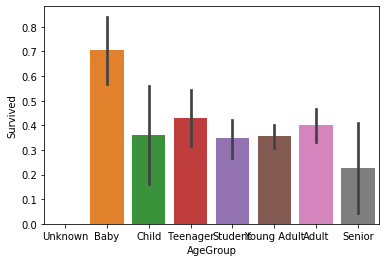

In [69]:
#sort the ages into logical categories
#sort the ages into logical categories
train["Age"] = train["Age"]
test["Age"] = test["Age"]
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [70]:
#creat dictionary
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [71]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,FareBand,AgeGroup
0,1,0,3,0,1,0,1,0,1,4.0
1,2,1,1,1,1,0,2,1,4,6.0
2,3,1,3,1,0,0,1,0,2,5.0
3,4,1,1,1,1,0,1,1,4,5.0
4,5,0,3,0,0,0,1,0,2,5.0


In [73]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,FareBand,AgeGroup
0,892,3,0,0,0,3,0,1,5.0
1,893,3,1,1,0,1,0,1,6.0
2,894,2,0,0,0,3,0,2,7.0
3,895,3,0,0,0,1,0,2,5.0
4,896,3,1,1,1,1,0,2,4.0


# Choosing the Best Model

In [74]:
#Splitting the Training Data¶

In [75]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [76]:
x_val.isnull().sum()

Pclass       0
Sex          0
SibSp        0
Parch        0
Embarked     0
CabinBool    0
FareBand     0
AgeGroup     0
dtype: int64

# Testing Different Models

In [77]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

80.71


In [78]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

82.74


In [79]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [80]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

81.73


C:\Users\jagadeesh baman\Documents\Python Scripts\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [81]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

77.66


In [82]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

82.74


In [83]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.28


In [84]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.74


In [85]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

82.23


In [86]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

85.28


In [87]:
#et's compare the accuracies of each model!

In [88]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.28
9,Gradient Boosting Classifier,85.28
0,Support Vector Machines,82.74
1,KNN,82.74
2,Logistic Regression,82.74
7,Decision Tree,82.74
8,Stochastic Gradient Descent,82.23
6,Linear SVC,81.73
4,Naive Bayes,80.71
5,Perceptron,77.66


In [89]:
#every model given good accuracy,I decided to use the Gradient Boosting Classifier model for the testing data,because we got
#high score in it

In [90]:
#It's time to create a submission.csv file to upload to the Kaggle competition!

In [91]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)